<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df = pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


For each of the following questions;

-	Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

-	Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

-	Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

-	What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

1.	State your hypothesis.

2.	Use α = 0.05

3.	Perform the test Statistics.

4.	State the conclusion from the test.

In [16]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [17]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


## Task 1: Become familiar with the dataset
The following describes the dataset variables:

· CRIM - per capita crime rate by town

· ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

· INDUS - proportion of non-retail business acres per town.

· CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

· NOX - nitric oxides concentration (parts per 10 million)

· RM - average number of rooms per dwelling

· AGE - proportion of owner-occupied units built prior to 1940

· DIS - weighted distances to five Boston employment centres

· RAD - index of accessibility to radial highways

· TAX - full-value property-tax rate per $10,000

· PTRATIO - pupil-teacher ratio by town

· LSTAT - % lower status of the population

· MEDV - Median value of owner-occupied homes in $1000's

## Task 2: Generate Descriptive Statistics and Visualizations
### For the 'Median value of owner-occupied homes' provide a boxplot

[Text(0.5, 0, 'Median home value')]

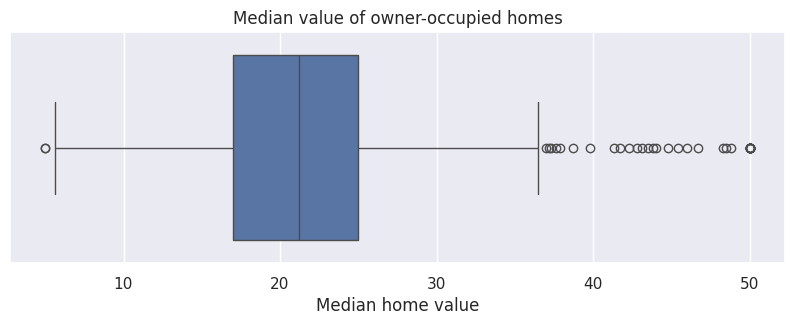

In [50]:
ax = sns.boxplot(x = 'MEDV', data = boston_df)
ax.set_title('Median value of owner-occupied homes')
sns.set_theme(rc={'figure.figsize':(10,3)})
ax.set(xlabel='Median home value in $10,000s')

# Median home value has a large slew of positive outliers on the high end.

### Provide a  bar plot for the Charles river variable

[Text(0.5, 0, 'Homes not on and on the Charles river'),
 Text(0, 0.5, 'House count')]

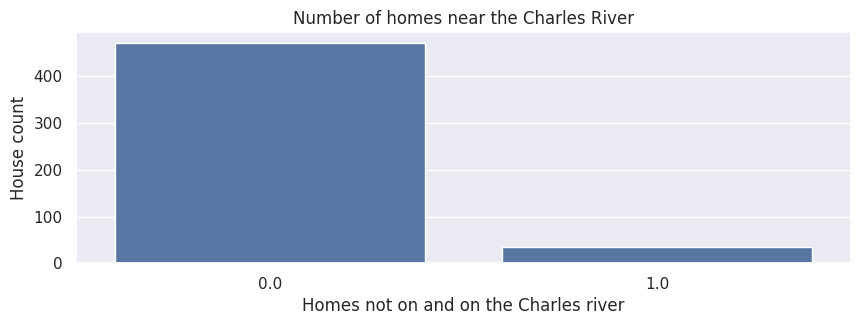

In [48]:
ax2 = sns.countplot(x = 'CHAS', data = boston_df)
ax2.set_title('Number of homes near the Charles River')
ax2.set(xlabel='Homes not on and on the Charles river', ylabel='House count')

# One can easily see the majority of homes are not on the river.

### Provide a boxplot for the MEDV variable vs the AGE variable

[Text(0.5, 0, 'Median home value'), Text(0, 0.5, 'Age of Home')]

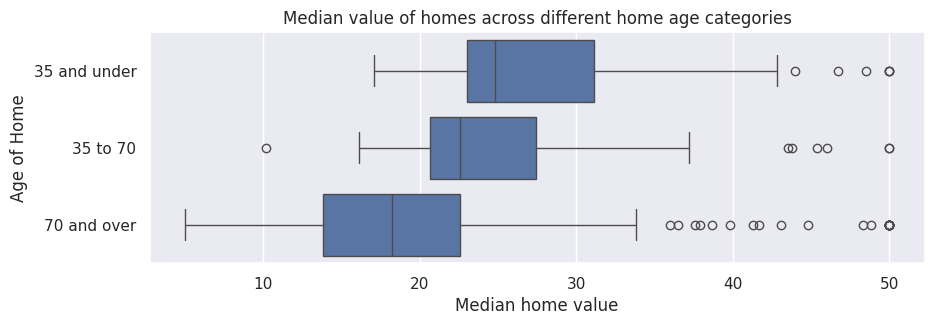

In [49]:
boston_df.loc[(boston_df['AGE'] <= 35), 'agecat'] = '35 and under'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'agecat'] = '35 to 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'agecat'] = '70 and over'

ax3 = sns.boxplot(x = 'MEDV', y = 'agecat', data = boston_df, order = ['35 and under', '35 to 70', '70 and over'])
ax3.set_title("Median value of homes across different home age categories")
ax3.set(xlabel='Median home value', ylabel='Age of Home')

# From the results of the plot, one can easily see the median value of homes goes up with decreasing age.

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
What can you say about the relationship?

[Text(0.5, 0, 'Proportion of non-retail businesses'),
 Text(0, 0.5, 'Nitric oxide concentration')]

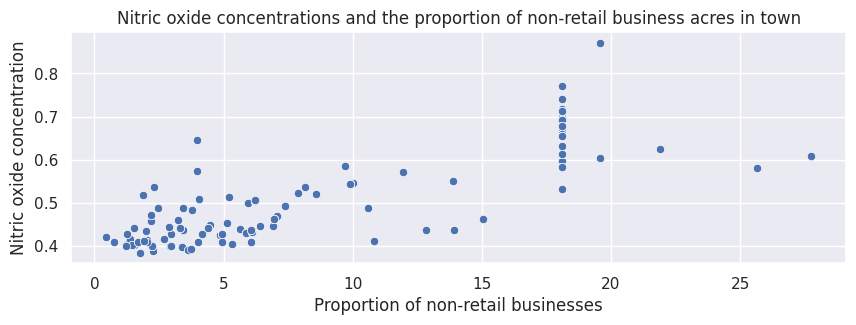

In [55]:
ax4 = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
ax4.set_title('Nitric oxide concentrations and the proportion of non-retail business acres in town')
ax4.set(xlabel = 'Proportion of non-retail businesses', ylabel = 'Nitric oxide concentration')

In [57]:
# From the above you can clearl visualize the relationship. Let's test for it.
# Testing for Pearson's correlation shows a strong positive linear relationship between the two variables and an incredibly low P-value.

scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

### Create a histogram for the pupil to teacher ratio variable

In [1]:
ax5 = sns.histplot(data = boston_df, x = 'PTRATIO', kde=True)
ax5.set_title('Pupil to teacher ratio')

NameError: name 'sns' is not defined

## Task 3: Use the appropriate tests to answer the questions provided.
### Is there a significant difference in median value of houses bounded by the Charles river or not?
(T-test for independent samples)

In [12]:
# H0 Charles river has no effect on median value of houses
# H1 there is an effect

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                      boston_df[boston_df['CHAS'] == 0]['MEDV'],
                      equal_var = True)

# Result is TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)
# p-value of 7.39e-05 is smaller than alpha 0.05; reject null hypothesis

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
(ANOVA)

In [61]:
# H0 No meaningful difference between median house value based on home age
# H1 there is a difference


from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

# P-value of 1.57e-18; reject null hypothesis

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
(Pearson Correlation)

In [62]:
# H0 no relationship between nitric oxide concentrations and proportion of non-retail business acres per town
# H1 there is a relationship

X = boston_df['INDUS']
y = boston_df['NOX']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

# P-value of 7.91e-98 catastrophically low, much lower than alpha of 0.05; reject null hypothesis, relationship established

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     705.1
Date:                Mon, 06 May 2024   Prob (F-statistic):           7.91e-98
Time:                        14:44:05   Log-Likelihood:                 594.45
No. Observations:                 506   AIC:                            -1185.
Df Residuals:                     504   BIC:                            -1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.006     64.710      0.000       0.399       0.424
INDUS          0.0129      0.000     26.554      0.000       0.012       0.014
==============================================================================
Omnibus:                       35.023   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.995
Skew:                           0.548   Prob(JB):                     3.78e-11
Kurtosis:                       4.038   Cond. No.                         25.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?
(Regression analysis)

In [63]:
# H0 distance to major Boston employment centers has no relationship with value of owner-occupied homes
# H1 there is a relationship

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

# P-value of 1.21e-08 much lower than alpha of 0.05; reject null hypothesis, relationship established
# The coefficient of DIS (the 'weighted distance to the five Boston employment centres') is 1.0916, an additional weighted distance increases 1.0916 to the 'Median value of owner occupied homes'(MEDV).

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.21e-08
Time:                        14:46:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""